Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [192]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [193]:
# collecting data from previous steps
london_stations_df = pd.read_pickle('city_bikes.pkl')
foursquare_places_df = pd.read_pickle('places.pkl')

In [230]:
london_stations_df.head()

,station_name,longitude,latitude,free_bikes,empty_slots,extra.uid
0,"Prince of Wales Drive, Battersea Park",-0.159170,51.475154,20,0,756
1,"Gloucester Road (North), Kensington",-0.183835,51.497925,9,8,97
2,"Durant Street, Bethnal Green",-0.065550,51.528682,16,5,702
3,"Charles II Street, West End",-0.131961,51.508446,1,22,226
4,"North Audley Street, Mayfair",-0.153645,51.512912,1,16,180


In [195]:
foursquare_places_df.head()

,restaurant_bar_name,distance,category,address,latitude,longitude,station_name,station_latitude,station_longitude
0,Putt In The Park Café,181,Pizzeria,"Putt in the Park Café, Battersea Park, Albert ...",51.475883,-0.161511,"Prince of Wales Drive, Battersea Park",51.475154,-0.15917
1,The Lighthouse,365,Pub,"441 Battersea Park Rd, Battersea, Greater Lond...",51.472635,-0.162558,"Prince of Wales Drive, Battersea Park",51.475154,-0.15917
2,Duke of Cambridge,519,Pub,"228 Battersea Bridge Rd (Banbury St), Batterse...",51.472987,-0.165825,"Prince of Wales Drive, Battersea Park",51.475154,-0.15917
3,Pear Tree Cafe,747,Café,"Battersea Park (Carriage Dr E), Battersea, Gre...",51.479719,-0.151237,"Prince of Wales Drive, Battersea Park",51.475154,-0.15917
4,Antipasto & Pasta,587,Italian Restaurant,"511 Battersea Park Road, London, Greater Londo...",51.471937,-0.165910,"Prince of Wales Drive, Battersea Park",51.475154,-0.15917


In [196]:
# to rename the extra.name columns in the london stations table to 'station_name' for consistency and to merge on station name
london_stations_df = london_stations_df.rename(columns={"extra.name": "station_name"})


In [231]:
# to join the london stations table with the foursquare places table on station name.
bike_places = pd.merge(london_stations_df, foursquare_places_df, on="station_name", how="left")

bike_places.head()


,station_name,longitude_x,latitude_x,free_bikes,empty_slots,extra.uid,restaurant_bar_name,distance,category,address,latitude_y,longitude_y,station_latitude,station_longitude
0,"Prince of Wales Drive, Battersea Park",-0.15917,51.475154,20,0,756,Putt In The Park Café,181,Pizzeria,"Putt in the Park Café, Battersea Park, Albert ...",51.475883,-0.161511,51.475154,-0.15917
1,"Prince of Wales Drive, Battersea Park",-0.15917,51.475154,20,0,756,The Lighthouse,365,Pub,"441 Battersea Park Rd, Battersea, Greater Lond...",51.472635,-0.162558,51.475154,-0.15917
2,"Prince of Wales Drive, Battersea Park",-0.15917,51.475154,20,0,756,Duke of Cambridge,519,Pub,"228 Battersea Bridge Rd (Banbury St), Batterse...",51.472987,-0.165825,51.475154,-0.15917
3,"Prince of Wales Drive, Battersea Park",-0.15917,51.475154,20,0,756,Pear Tree Cafe,747,Café,"Battersea Park (Carriage Dr E), Battersea, Gre...",51.479719,-0.151237,51.475154,-0.15917
4,"Prince of Wales Drive, Battersea Park",-0.15917,51.475154,20,0,756,Antipasto & Pasta,587,Italian Restaurant,"511 Battersea Park Road, London, Greater Londo...",51.471937,-0.165910,51.475154,-0.15917


In [162]:
bike_places.to_csv("bike_places_left.csv", index=False)

In [232]:
# To drop duplicate or unnecessary columns
bike_places_cleaned = bike_places.drop(columns=[
    "latitude_y", "longitude_y", "station_latitude", "station_longitude"
])

# Renaming columns for clarity
bike_places_cleaned = bike_places_cleaned.rename(columns={
    "latitude_x": "station_latitude",
    "longitude_x": "station_longitude",
    "restaurant_bar_name": "poi_name",        # POI = Point of Interest ie restaurants and bars
    "category": "poi_category",
    "address": "poi_address",
    "distance": "poi_distance"     # distance between the bike station and the poi(restaurant or bar)
})


bike_places_cleaned.head()


,station_name,station_longitude,station_latitude,free_bikes,empty_slots,extra.uid,poi_name,poi_distance,poi_category,poi_address
0,"Prince of Wales Drive, Battersea Park",-0.15917,51.475154,20,0,756,Putt In The Park Café,181,Pizzeria,"Putt in the Park Café, Battersea Park, Albert ..."
1,"Prince of Wales Drive, Battersea Park",-0.15917,51.475154,20,0,756,The Lighthouse,365,Pub,"441 Battersea Park Rd, Battersea, Greater Lond..."
2,"Prince of Wales Drive, Battersea Park",-0.15917,51.475154,20,0,756,Duke of Cambridge,519,Pub,"228 Battersea Bridge Rd (Banbury St), Batterse..."
3,"Prince of Wales Drive, Battersea Park",-0.15917,51.475154,20,0,756,Pear Tree Cafe,747,Café,"Battersea Park (Carriage Dr E), Battersea, Gre..."
4,"Prince of Wales Drive, Battersea Park",-0.15917,51.475154,20,0,756,Antipasto & Pasta,587,Italian Restaurant,"511 Battersea Park Road, London, Greater Londo..."


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [199]:
#to get a quick summary of the data
bike_places_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39808 entries, 0 to 39807
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   station_name       39808 non-null  object 
 1   station_longitude  39808 non-null  float64
 2   station_latitude   39808 non-null  float64
 3   free_bikes         39808 non-null  int64  
 4   empty_slots        39808 non-null  int64  
 5   extra.uid          39808 non-null  int64  
 6   poi_name           39808 non-null  object 
 7   poi_distance       39808 non-null  int64  
 8   poi_category       39808 non-null  object 
 9   poi_address        39808 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.0+ MB


In [200]:
print('')
bike_places_cleaned.describe()

,station_longitude,station_latitude,free_bikes,empty_slots,extra.uid,poi_distance
count,39808.000000,39808.000000,39808.000000,39808.000000,39808.000000,39808.000000
mean,-0.127690,51.505977,11.157104,13.501658,433.728421,625.945137
std,0.055123,0.020333,8.256799,9.281135,250.714799,248.796507
min,-0.236770,51.452997,0.000000,0.000000,1.000000,5.000000
25%,-0.172191,51.493130,4.000000,7.000000,214.000000,438.000000
50%,-0.129698,51.509224,10.000000,13.000000,442.000000,657.000000
75%,-0.091402,51.520963,16.000000,18.000000,653.000000,837.000000
max,-0.002275,51.549369,41.000000,51.000000,878.000000,1334.000000


In [201]:
# to get the count of each category
bike_places_cleaned['poi_category'].value_counts().head(10)

poi_category
Pub                   8555
Italian Restaurant    2144
Restaurant            1694
Burger Joint          1305
Bar                   1283
Sandwich Spot         1219
Pizzeria              1181
Cocktail Bar          1130
Indian Restaurant     1013
French Restaurant      855
Name: count, dtype: int64

### Distribution of free_bikes across stations

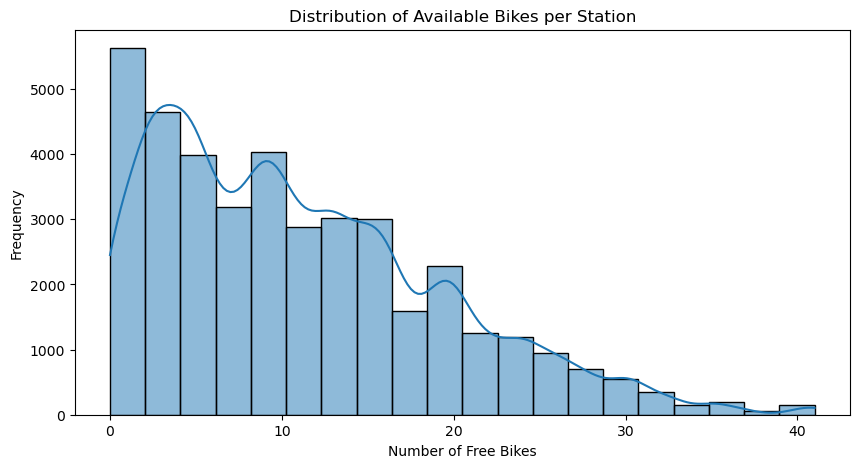

In [202]:
# to visualize the distribution free bikes free bike per station

plt.figure(figsize=(10, 5))
sns.histplot(bike_places_cleaned['free_bikes'], bins=20, kde=True)
plt.title("Distribution of Available Bikes per Station")
plt.xlabel("Number of Free Bikes")
plt.ylabel("Frequency")
plt.show()


### Most Common Types of Nearby Places

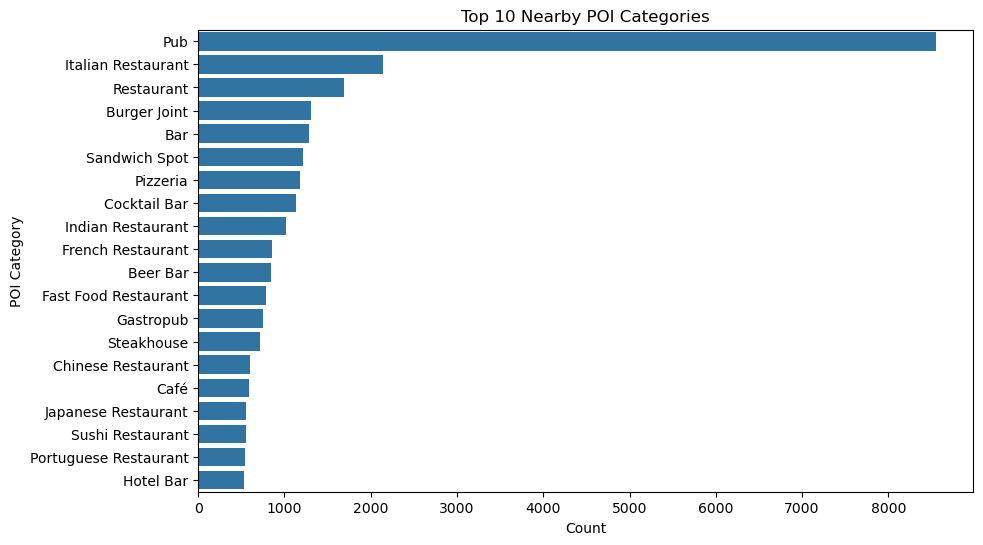

In [203]:
top_categories = bike_places_cleaned['poi_category'].value_counts().head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title("Top 10 Nearby POI Categories")
plt.xlabel("Count")
plt.ylabel("POI Category")
plt.show()


### Average Number of Free Bikes per POI Category

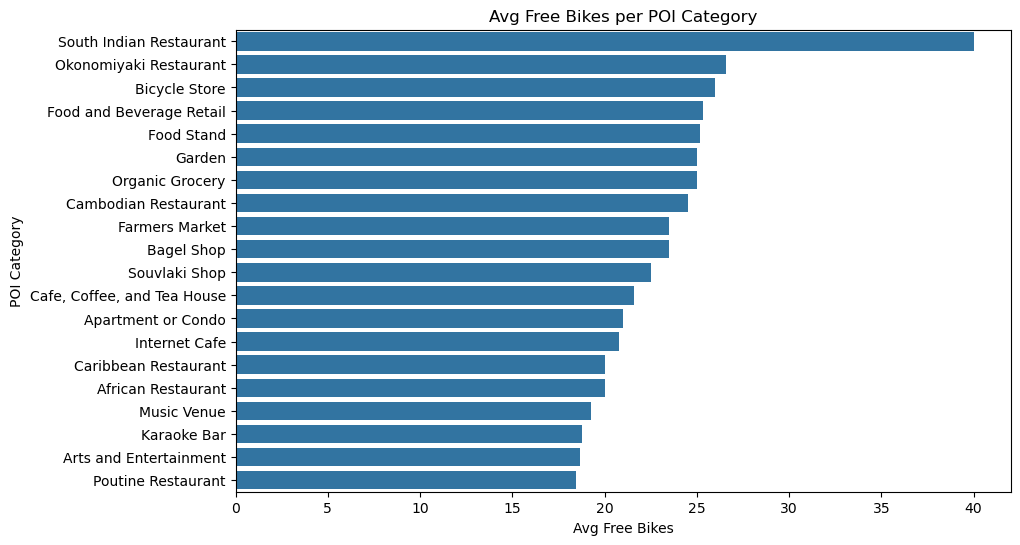

In [204]:
avg_bikes_by_category = bike_places_cleaned.groupby('poi_category')['free_bikes'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_bikes_by_category.values, y=avg_bikes_by_category.index)
plt.title("Avg Free Bikes per POI Category")
plt.xlabel("Avg Free Bikes")
plt.ylabel("POI Category")
plt.show()


### Distance to POIs vs. Free Bikes

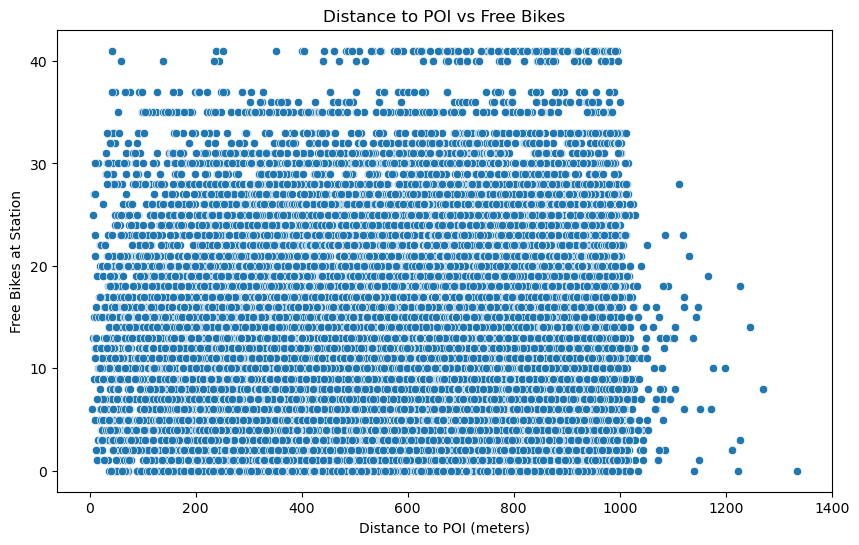

In [205]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=bike_places_cleaned, x='poi_distance', y='free_bikes')
plt.title("Distance to POI vs Free Bikes")
plt.xlabel("Distance to POI (meters)")
plt.ylabel("Free Bikes at Station")
plt.show()


In [206]:
poi_counts = bike_places_cleaned.groupby('station_name').agg(
    num_pois=('poi_name', 'count')
).reset_index()

poi_counts.sort_values(by='num_pois', ascending=False)


,station_name,num_pois
0,"Abbey Orchard Street, Westminster",50
520,"Parson's Green , Parson's Green",50
522,"Pembridge Villas, Notting Hill",50
523,"Penfold Street, Marylebone",50
524,"Pennington Street, Wapping",50
...,...,...
715,"Triangle Car Park, Hyde Park",40
405,"Langdon Park, Poplar",39
82,"Bolsover Street, Fitzrovia",37
648,"Spindrift Avenue, Millwall",32


In [207]:
# to check correlation
bike_places_cleaned[['poi_distance', 'free_bikes']].corr()

,poi_distance,free_bikes
poi_distance,1.000000,-0.056624
free_bikes,-0.056624,1.000000


In [208]:
model_df = bike_places_cleaned.copy()

# to remove places ot interest with missing poi_distance and poi_category
model_df = model_df.dropna(subset=['poi_distance', 'poi_category'])

# Merge in poi_counts
model_df = model_df.merge(poi_counts, on='station_name', how='left')


In [209]:
features = model_df[[
    'free_bikes',
    'empty_slots',
    'poi_distance',  # distance to POI from station
    'num_pois'
]]


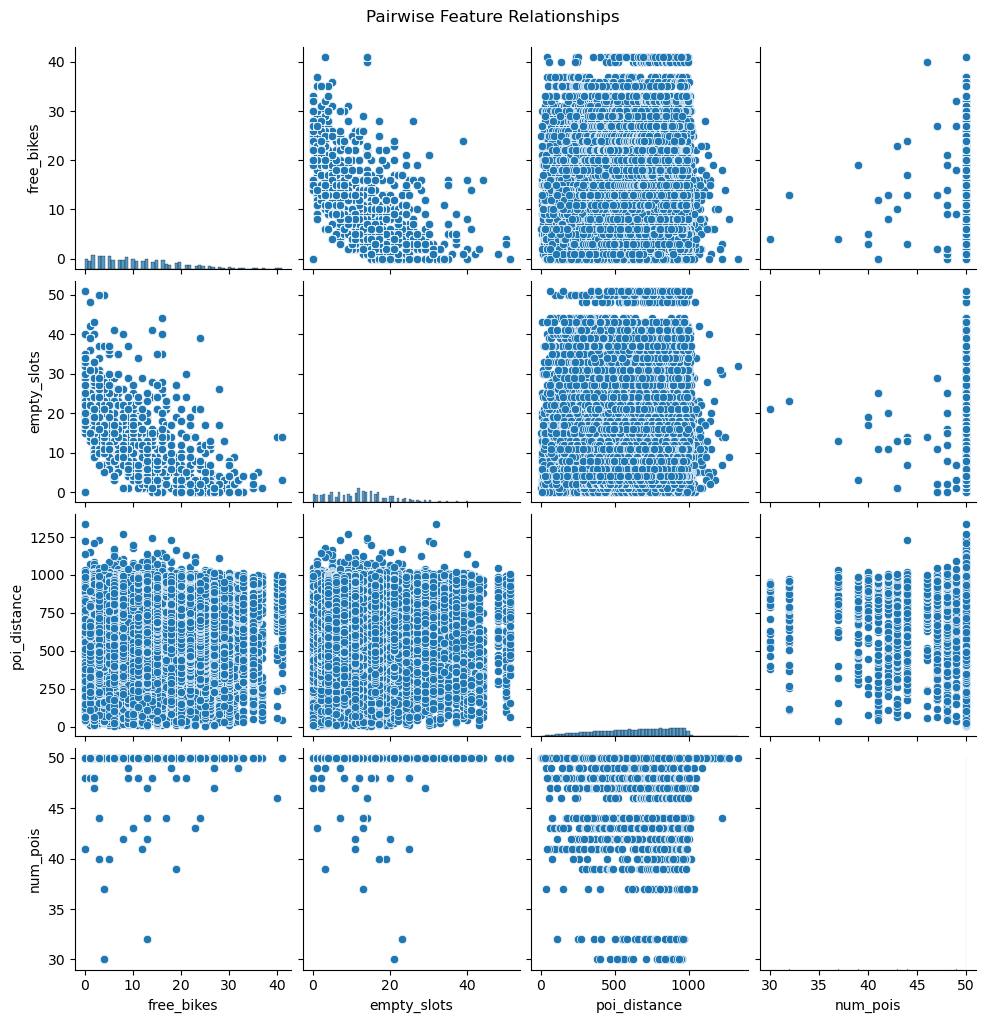

In [210]:
# to analyze the correlationship between the variables.
sns.pairplot(features)
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()


In [211]:
# Merge the number of POIs into the main DataFrame
bike_places_cleaned = bike_places_cleaned.merge(
    poi_counts,
    on='station_name',
    how='left'
)


In [221]:
bike_places_cleaned

,station_name,station_longitude,station_latitude,free_bikes,empty_slots,extra.uid,poi_name,poi_distance,poi_category,poi_address,num_pois
0,"Prince of Wales Drive, Battersea Park",-0.15917,51.475154,20,0,756,Putt In The Park Café,181,Pizzeria,"Putt in the Park Café, Battersea Park, Albert ...",50
1,"Prince of Wales Drive, Battersea Park",-0.15917,51.475154,20,0,756,The Lighthouse,365,Pub,"441 Battersea Park Rd, Battersea, Greater Lond...",50
2,"Prince of Wales Drive, Battersea Park",-0.15917,51.475154,20,0,756,Duke of Cambridge,519,Pub,"228 Battersea Bridge Rd (Banbury St), Batterse...",50
3,"Prince of Wales Drive, Battersea Park",-0.15917,51.475154,20,0,756,Pear Tree Cafe,747,Café,"Battersea Park (Carriage Dr E), Battersea, Gre...",50
4,"Prince of Wales Drive, Battersea Park",-0.15917,51.475154,20,0,756,Antipasto & Pasta,587,Italian Restaurant,"511 Battersea Park Road, London, Greater Londo...",50
...,...,...,...,...,...,...,...,...,...,...,...
39803,"St. Mary Axe, Aldgate",-0.08066,51.514225,3,16,263,The Folly,501,Cocktail Bar,"41 Gracechurch St (at Eastcheap), London, Grea...",50
39804,"St. Mary Axe, Aldgate",-0.08066,51.514225,3,16,263,Pret a Manger,464,Sandwich Spot,"1 Great Tower Street, London, Greater London, ...",50
39805,"St. Mary Axe, Aldgate",-0.08066,51.514225,3,16,263,The Sugar Loaf,866,Pub,"65 Cannon St, London, Greater London, EC4N 5AA",50
39806,"St. Mary Axe, Aldgate",-0.08066,51.514225,3,16,263,Long Arm Sports Pub & Brewery,936,Brewery,"20-26 Worship St, London, Greater London, EC2A...",50


In [216]:
bike_places_cleaned.to_pickle("data_for_model.pkl")

In [220]:
bike_places_cleaned.dtypes

station_name          object
station_longitude    float64
station_latitude     float64
free_bikes             int64
empty_slots            int64
extra.uid              int64
poi_name              object
poi_distance           int64
poi_category          object
poi_address           object
num_pois               int64
dtype: object

In [225]:
bike_places_cleaned = bike_places_cleaned.rename(columns={"extra.uid": "extra_uid"})

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [229]:
import sqlite3


# create SQLite database using data from FOursquare and CityBike

# 1. To connect to the SQLite database (it will create a new database file if it doesn't exist)
conn = sqlite3.connect('bike_places.db')  
cursor = conn.cursor()

# 2. To create a table to store the data 
cursor.execute('''
CREATE TABLE IF NOT EXISTS bike_places_cleaned (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    station_name TEXT,
    station_longitude REAL,
    station_latitude REAL,
    free_bikes INTEGER,
    empty_slots INTEGER,
    extra_uid INTEGER,
    poi_name TEXT,
    poi_distance INTEGER,
    poi_category TEXT,
    poi_address TEXT,
    num_pois INTEGER
)
''')

# 3. To convert DataFrame to SQL table
bike_places_cleaned.to_sql('bike_places_cleaned', conn, if_exists='replace', index=False)



# 4. To commit the transaction and close the connection
conn.commit()
conn.close()